<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Mice%2BMissForest%20TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable.xlsx')
df = df.iloc[:, 1:]
df

,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,...,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),L1:eGFR,L14:WBC,LabLocation,LabCwhen
0,924852,2.63,15.80,2560-08-07 12:32:50.527,4376081,18.847273,0,90,0,90,...,NaN,NaN,NaN,NaN,NaN,NaN,15.80,6.67,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-08-07 12:15:51.760
1,989278,2.03,32.30,2560-08-11 08:22:48.737,4390501,4.319167,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,32.30,9.65,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-08-11 10:22:04.653
2,2103792,1.05,55.90,2560-08-14 14:38:44.150,4394805,0.882418,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,55.90,7.48,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-08-14 15:03:54.277
3,953611,1.03,51.10,2560-08-15 02:05:01.323,4395019,6.312446,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,51.10,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-08-15 02:05:01.583
4,488150,1.94,32.60,2560-08-15 09:18:43.240,4396053,2.848364,0,0,0,0,...,NaN,150.0,NaN,NaN,NaN,NaN,32.60,4.66,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-08-15 09:45:34.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,43763,1.30,55.28,2566-04-10 15:34:20.643,5674644,-9.146778,0,90,0,90,...,NaN,NaN,NaN,NaN,NaN,NaN,68.10,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2561-10-25 09:43:02.440
52615,43763,1.30,55.28,2566-04-10 15:34:20.643,6817059,-4.929870,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,84.60,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2562-11-06 09:08:22.770
52616,43763,1.30,55.28,2566-04-10 15:34:20.643,8004571,16.017287,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,56.06,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2563-12-29 10:39:32.263
52617,43763,1.30,55.28,2566-04-10 15:34:20.643,9214741,-24.861814,0,100,0,100,...,NaN,NaN,NaN,NaN,NaN,NaN,61.33,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2565-02-25 08:17:16.137


In [4]:
columns_with_null = df.columns[df.isnull().any()].tolist()
print(columns_with_null)

['Systolic BP', 'Diastolic BP', 'BMI', 'BSA', 'L2:BUN', 'L3:Creatinine', 'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric', 'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin', 'L13:Hematocrit', 'L15:Platelet', 'L16:TIBC', 'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c', 'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol', 'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D', 'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio', 'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)', 'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)', 'L14:WBC']


In [5]:
data = pd.DataFrame(df)

In [6]:
data = pd.DataFrame(df)
##column missing value > 50k
remove = ['L16:TIBC','L17:Tranferin SAT','L18:Ferritin','L25:Parathyroid hormone',
          'L26:Vitamin D','L27:UrineAlbumin/Cr ratio','L28:UrineProtein/Cr ratio',
          'L29:UrineVolume (24hrs)','L30:UrineUrea (24hrs)',
          'L31:UrineSodium (24hrs)','L32:UrineProtein (24hrs)']
data = data.drop(remove, axis=1)

**MICE + MissForest โดยทำ MICE แค่ที่มีความสัมพันธ์กับตัวแปรที่ไม่มีค่าว่างสูง**



In [8]:
!pip install statsmodels

In [7]:
import pandas as pd
column_to_exclude = 'Slopes'
null_columns = data.columns[data.isnull().any()]
numeric_non_null_columns = data.select_dtypes(include=[float, int]).columns[~data.select_dtypes(include=[float, int]).isnull().any() & (data.select_dtypes(include=[float, int]).columns != column_to_exclude)]
data[null_columns] = data[null_columns].apply(pd.to_numeric, errors='coerce')
correlation_matrix = data.corr()
correlation = correlation_matrix.loc[null_columns, numeric_non_null_columns]

<ipython-input-7-cb709e0075f0>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [9]:
print(data[null_columns].dtypes)

Systolic BP            float64
Diastolic BP           float64
BMI                    float64
BSA                    float64
L2:BUN                 float64
L3:Creatinine          float64
L4:Sodium              float64
L5:Potassium           float64
L6:Chloride            float64
L7:Bicarbonate         float64
L8:Uric                float64
L9:Calcium             float64
L10:Phosphorus         float64
L11:Albumin            float64
L12:Hemoglobin         float64
L13:Hematocrit         float64
L15:Platelet           float64
L19:Blood sugar        float64
L20:HbA1c              float64
L21:Cholesterol        float64
L22:Triglyceride       float64
L23:LDL Cholesterol    float64
L24:HDL Cholesterol    float64
L14:WBC                float64
dtype: object


In [10]:
threshold = 0.7

high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

for pair in high_correlation_pairs:
    print(f"High Correlation: {pair[0]} - {pair[1]} (r = {pair[2]:.2f})")


High Correlation: Recent_Creatinine - L3:Creatinine (r = 0.78)
High Correlation: Recent_eGFR - L1:eGFR (r = 0.71)
High Correlation: InPatient - OutPatient (r = -0.79)
High Correlation: L2:BUN - L3:Creatinine (r = 0.72)
High Correlation: L4:Sodium - L6:Chloride (r = 0.72)
High Correlation: L12:Hemoglobin - L13:Hematocrit (r = 0.97)
High Correlation: L21:Cholesterol - L23:LDL Cholesterol (r = 0.91)


In [11]:
import numpy as np
correlation_matrix = data.corr()
correlation_threshold = 0.7
imputer_methods = {}

for column in data.columns:
    if column != 'Slopes':
        if data[column].dtype in [np.float64, np.int64]:  # Check if the column contains numeric data
            correlations_with_others = correlation_matrix[column].drop(column)
            high_correlation = (np.abs(correlations_with_others) > correlation_threshold).any()
            if high_correlation:
                imputer_methods[column] = 'MICE'
            else:
                imputer_methods[column] = 'MissForest'

<ipython-input-11-3f0bf5cdafb5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [12]:
columns_to_use_mice = [column for column, method in imputer_methods.items() if method == 'MICE']
print(columns_to_use_mice)

['Recent_Creatinine', 'Recent_eGFR', 'InPatient', 'OutPatient', 'L2:BUN', 'L3:Creatinine', 'L4:Sodium', 'L6:Chloride', 'L12:Hemoglobin', 'L13:Hematocrit', 'L21:Cholesterol', 'L23:LDL Cholesterol', 'L1:eGFR']


<ipython-input-13-3b1576d2c98c>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


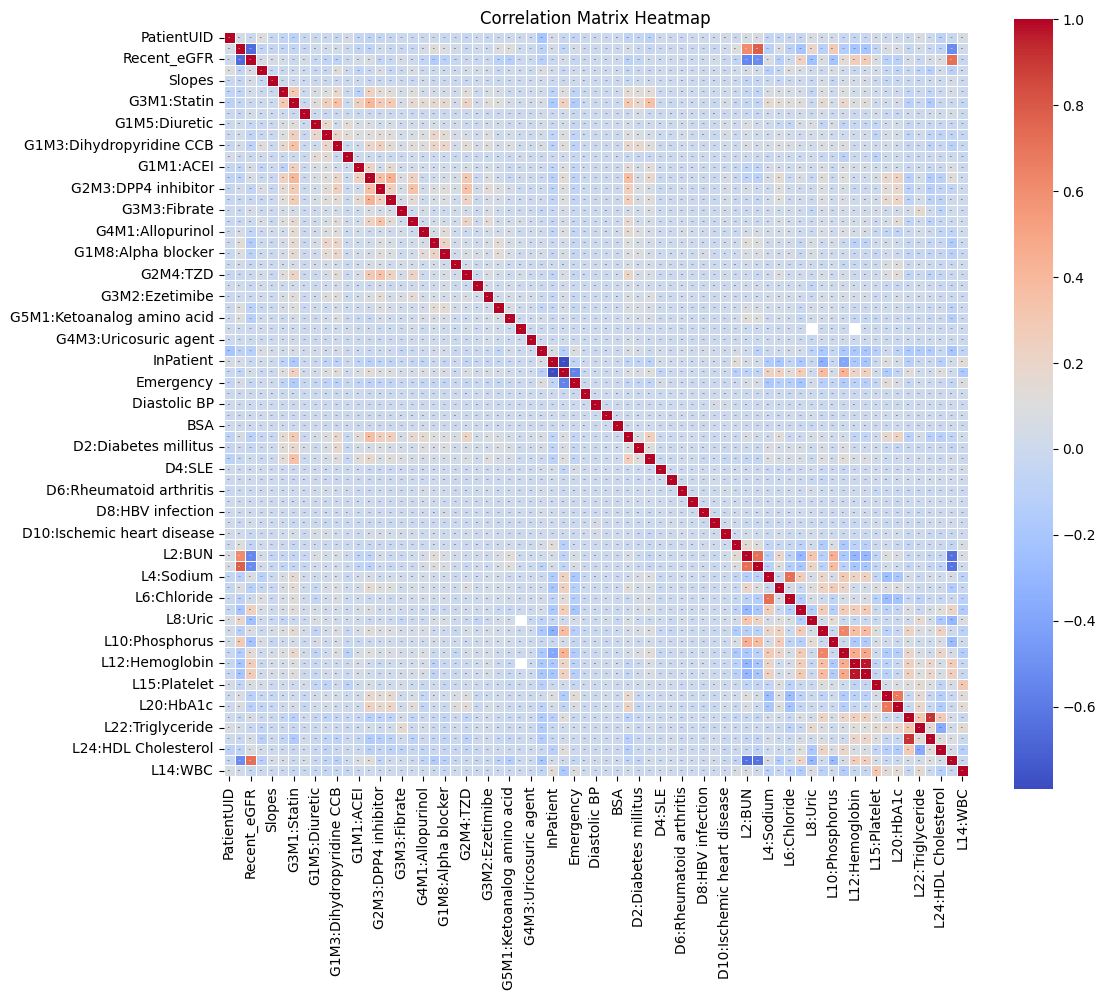

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a larger heatmap with customizations
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar=True,  # Add color bar
    square=True,  # Make the heatmap square
    annot_kws={"size": 1}  # Increase font size of annotations
)
plt.title("Correlation Matrix Heatmap")
plt.show()


## **MICE**

In [14]:
# Columns to impute using MICE
columns_to_mice = ['Recent_Creatinine', 'Recent_eGFR', 'InPatient', 'OutPatient',
                    'L2:BUN', 'L3:Creatinine', 'L4:Sodium', 'L6:Chloride', 'L12:Hemoglobin',
                    'L13:Hematocrit', 'L21:Cholesterol', 'L23:LDL Cholesterol','L1:eGFR']
print(data[columns_to_mice].dtypes)

Recent_Creatinine      float64
Recent_eGFR            float64
InPatient                int64
OutPatient               int64
L2:BUN                 float64
L3:Creatinine          float64
L4:Sodium              float64
L6:Chloride            float64
L12:Hemoglobin         float64
L13:Hematocrit         float64
L21:Cholesterol        float64
L23:LDL Cholesterol    float64
L1:eGFR                float64
dtype: object


In [15]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the MICE imputer
imputer = IterativeImputer(random_state=0)

# Fit and transform the specified columns using MICE
data[columns_to_mice] = imputer.fit_transform(data[columns_to_mice]) ##I use only Columns using MICE to fit()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


##**MissForest**

In [16]:
columns_to_miss = ['PatientUID', 'PatientVisitUID', 'G1M2:ARB', 'G3M1:Statin',
                    'G5M2:NSAIDs', 'G1M5:Diuretic', 'G1M7:Beta blocker', 'G1M3:Dihydropyridine CCB',
                    'G1M6:MRA', 'G1M1:ACEI', 'G2M2:Metformin', 'G2M3:DPP4 inhibitor', 'G2M1:SU', 'G3M3:Fibrate',
                    'G2M5:SGLT2i', 'G4M1:Allopurinol', 'G1M9:Vasodilator', 'G1M8:Alpha blocker', 'G2M6:Insulin',
                    'G2M4:TZD', 'G4M2:Febuxostat', 'G3M2:Ezetimibe', 'G1M4:Non-dihydropyridine CCB', 'G5M1:Ketoanalog amino acid',
                    'G2M7:GLP1-RA', 'G4M3:Uricosuric agent', 'Age', 'Emergency', 'Systolic BP', 'Diastolic BP', 'BMI', 'BSA',
                    'D1:Hypertension', 'D2:Diabetes millitus', 'D3:Dyslipidemia', 'D4:SLE', 'D5:Systemic sclerosis',
                    'D6:Rheumatoid arthritis', 'D7:HIV infection', 'D8:HBV infection', 'D9:HCV infection', 'D10:Ischemic heart disease',
                    'D11:Heart failure', 'L5:Potassium', 'L7:Bicarbonate', 'L8:Uric', 'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin',
                    'L15:Platelet', 'L16:TIBC', 'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c', 'L22:Triglyceride',
                    'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D', 'L28:UrineProtein/Cr ratio', 'L29:UrineVolume (24hrs)',
                    'L30:UrineUrea (24hrs)', 'L31:UrineSodium (24hrs)', 'L14:WBC']
columns_with_null = data.columns[data.isnull().any()].tolist()
columns_with_non_null = data.columns.difference(columns_with_null).tolist()

columns_to_miss_with_null = [col for col in columns_to_miss if col in columns_with_null]
columns_to_miss_without_null = [col for col in columns_to_miss if col in columns_with_non_null]

print("Columns with null values:")
print(data[columns_to_miss_with_null].dtypes)

print("\nColumns without null values:")
print(data[columns_to_miss_without_null].dtypes)


Columns with null values:
Systolic BP            float64
Diastolic BP           float64
BMI                    float64
BSA                    float64
L5:Potassium           float64
L7:Bicarbonate         float64
L8:Uric                float64
L9:Calcium             float64
L10:Phosphorus         float64
L11:Albumin            float64
L15:Platelet           float64
L19:Blood sugar        float64
L20:HbA1c              float64
L22:Triglyceride       float64
L24:HDL Cholesterol    float64
L14:WBC                float64
dtype: object

Columns without null values:
PatientUID                      int64
PatientVisitUID                 int64
G1M2:ARB                        int64
G3M1:Statin                     int64
G5M2:NSAIDs                     int64
G1M5:Diuretic                   int64
G1M7:Beta blocker               int64
G1M3:Dihydropyridine CCB        int64
G1M6:MRA                        int64
G1M1:ACEI                       int64
G2M2:Metformin                  int64
G2M3:DPP4 inhibi

In [17]:
# Store the original column names
original_columns = {}
for col in data.columns:
    original_columns[col.replace(" ", "").replace(":", "").replace("-", "").replace("/", "").replace("&", "").replace("#", "")] = col


**ต้องเปลี่ยนชื่อ เพราะ missforest รองรับแค่ JSON feature name**

In [18]:
# Rename only null_missforest columns
for col in data.columns:
    data = data.rename(columns={col: col.replace(" ", "").replace(":", "").replace("-", "").replace("/", "").replace("&", "").replace("#", "")})


In [ ]:
print("Original column names:")
for new_name, old_name in original_columns.items():
    print(f"{new_name} -> {old_name}")



```
columns_to_miss_rename = ['PatientUID', 'PatientVisitUID', 'G1M2ARB', 'G3M1Statin',
                    'G5M2NSAIDs', 'G1M5Diuretic', 'G1M7Betablocker', 'G1M3DihydropyridineCCB',
                    'G1M6MRA', 'G1M1ACEI', 'G2M2Metformin', 'G2M3DPP4inhibitor', 'G2M1SU', 'G3M3Fibrate',
                    'G2M5SGLT2i', 'G4M1Allopurinol', 'G1M9Vasodilator', 'G1M8Alphablocker', 'G2M6Insulin',
                    'G2M4TZD', 'G4M2Febuxostat', 'G3M2Ezetimibe', 'G1M4NondihydropyridineCCB', 'G5M1Ketoanalogaminoacid',
                    'G2M7GLP1RA', 'G4M3Uricosuricagent', 'Age', 'Emergency', 'SystolicBP', 'DiastolicBP', 'BMI', 'BSA',
                    'D1Hypertension', 'D2Diabetesmillitus', 'D3Dyslipidemia', 'D4SLE', 'D5Systemicsclerosis',
                    'D6Rheumatoidarthritis', 'D7HIVinfection', 'D8HBVinfection', 'D9HCVinfection', 'D10Ischemicheartdisease',
                    'D11Heartfailure', 'L5Potassium', 'L7Bicarbonate', 'L8Uric', 'L9Calcium', 'L10Phosphorus', 'L11Albumin',
                    'L15Platelet', 'L16TIBC', 'L17TranferinSAT', 'L18Ferritin', 'L19Bloodsugar', 'L20HbA1c', 'L22Triglyceride',
                    'L24HDLCholesterol', 'L25Parathyroidhormone', 'L26VitaminD', 'L28UrineProteinCrratio', 'L29UrineVolume(24hrs)',
                    'L30UrineUrea(24hrs)', 'L31UrineSodium(24hrs)', 'L14WBC']
```



In [19]:
data

,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2ARB,G3M1Statin,G5M2NSAIDs,G1M5Diuretic,...,L19Bloodsugar,L20HbA1c,L21Cholesterol,L22Triglyceride,L23LDLCholesterol,L24HDLCholesterol,L1eGFR,L14WBC,LabLocation,LabCwhen
0,924852,2.63,15.80,2560-08-07 12:32:50.527,4376081,18.847273,0,90,0,90,...,106.0,6.2,170.000000,198.0,89.000000,59.0,15.80,6.67,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-08-07 12:15:51.760
1,989278,2.03,32.30,2560-08-11 08:22:48.737,4390501,4.319167,0,0,0,0,...,138.0,5.6,149.000000,NaN,105.824418,NaN,32.30,9.65,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-08-11 10:22:04.653
2,2103792,1.05,55.90,2560-08-14 14:38:44.150,4394805,0.882418,0,0,0,0,...,NaN,NaN,162.030352,NaN,82.011227,NaN,55.90,7.48,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-08-14 15:03:54.277
3,953611,1.03,51.10,2560-08-15 02:05:01.323,4395019,6.312446,0,0,0,0,...,NaN,NaN,170.665759,NaN,111.709300,NaN,51.10,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-08-15 02:05:01.583
4,488150,1.94,32.60,2560-08-15 09:18:43.240,4396053,2.848364,0,0,0,0,...,75.0,NaN,147.891764,NaN,104.050429,NaN,32.60,4.66,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-08-15 09:45:34.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,43763,1.30,55.28,2566-04-10 15:34:20.643,5674644,-9.146778,0,90,0,90,...,139.0,8.2,160.000000,188.0,101.000000,41.0,68.10,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2561-10-25 09:43:02.440
52615,43763,1.30,55.28,2566-04-10 15:34:20.643,6817059,-4.929870,0,0,0,0,...,128.0,7.6,158.000000,172.0,113.000000,40.0,84.60,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2562-11-06 09:08:22.770
52616,43763,1.30,55.28,2566-04-10 15:34:20.643,8004571,16.017287,0,0,0,0,...,NaN,NaN,162.000000,170.0,112.000000,39.0,56.06,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2563-12-29 10:39:32.263
52617,43763,1.30,55.28,2566-04-10 15:34:20.643,9214741,-24.861814,0,100,0,100,...,127.0,6.6,151.000000,164.0,92.000000,41.0,61.33,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2565-02-25 08:17:16.137




```
this cell takes long execute time
```



In [ ]:

!pip install missingpy
!pip install MissForest
import pandas as pd
from missforest.missforest import MissForest

# Make an instance and perform the imputation
imputer = MissForest()
X = data.drop('Slopes', axis=1)
X_imputed = imputer.fit_transform(X)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 1.5 MB/s eta 0:00:00


In [ ]:
X_imputed

In [ ]:
# Rename the columns back to their original state
data = data.rename(columns=original_columns)

In [ ]:
data

In [ ]:
#data.to_excel('MICE+MissForest.xlsx')